# 3. 케라스 (Keras)

## 3.1 딥러닝 준비

- 하이퍼 파라미터: 사용자가 직접 설정해주는 설정 값. 모델이 훈련하며 가중치와 편향은 자동 업데이트 되고 조정되며 알아서 변하지만 학습 속도, 반복 훈련 횟수 등 직접 설정 해야 하는 값들이 하이퍼 파라미터.
- 과소적합: 모델이 충분히 학습되지 않아 예측 성능이 떨어지는 경우
- 과대적합: 학습 데이터를 지나치게 반복 학습해 과하게 적합된 상태.
- 에포크: 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프
- 손실 함수: 예측 값과 정답 값의 차이 또는 오차.
  - 지도 학습 이진 분류:binary_crossentropy. sigmoid 사용
  - 다중 분류: categorical_crossentropy, 다중 분류 클래스가 원핫 벡터인 경우 사용. 레이블 값인 경우 sparse_categorical_crossentropy 사용. softmax 활성함수 사용.
  - 회귀: 평균제곱오차, 평균절대오차, 후버 등

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

- 경사 하강법: 모델 내부 가중치 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법.

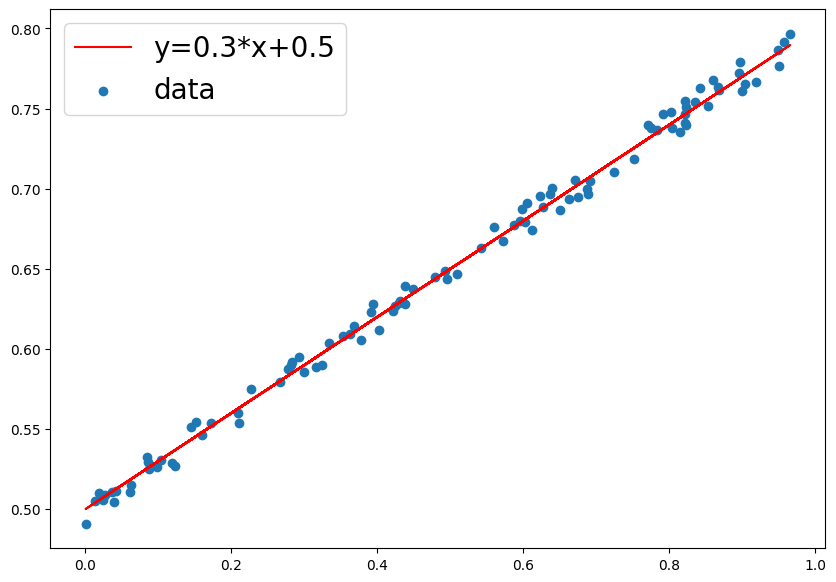

w:0.3, b: 0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w*x+b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y={w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b: {b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [2]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률
learning_rate=0.005

# 에러 기록
errors=[]

# random 한 값으로 w, b 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w*x+b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w-learning_rate*((y_hat-y)*x).sum()
  b = b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch%5==0:
    print("{0:2} w={1:.5f}, b={2:.5f} error={3:.5f}".format(epoch,w,b,error))

print("----" *15)
print("{0:2} w={1:.1f}, b={2:.1f} error={3:.5f}".format(epoch,w,b,error))

 0 w=0.86339, b=0.29285 error=4.42696
 5 w=0.74276, b=0.26474 error=0.90081
10 w=0.67318, b=0.30122 error=0.64017
15 w=0.61476, b=0.33236 error=0.45516
20 w=0.56553, b=0.35861 error=0.32376
25 w=0.52404, b=0.38074 error=0.23045
30 w=0.48908, b=0.39938 error=0.16417
35 w=0.45961, b=0.41509 error=0.11711
40 w=0.43478, b=0.42833 error=0.08368
45 w=0.41385, b=0.43949 error=0.05994
50 w=0.39622, b=0.44889 error=0.04308
55 w=0.38136, b=0.45681 error=0.03111
60 w=0.36883, b=0.46349 error=0.02260
65 w=0.35828, b=0.46912 error=0.01656
70 w=0.34938, b=0.47386 error=0.01228
75 w=0.34189, b=0.47786 error=0.00923
80 w=0.33557, b=0.48123 error=0.00707
85 w=0.33025, b=0.48407 error=0.00553
------------------------------------------------------------
88 w=0.3, b=0.5 error=0.00483


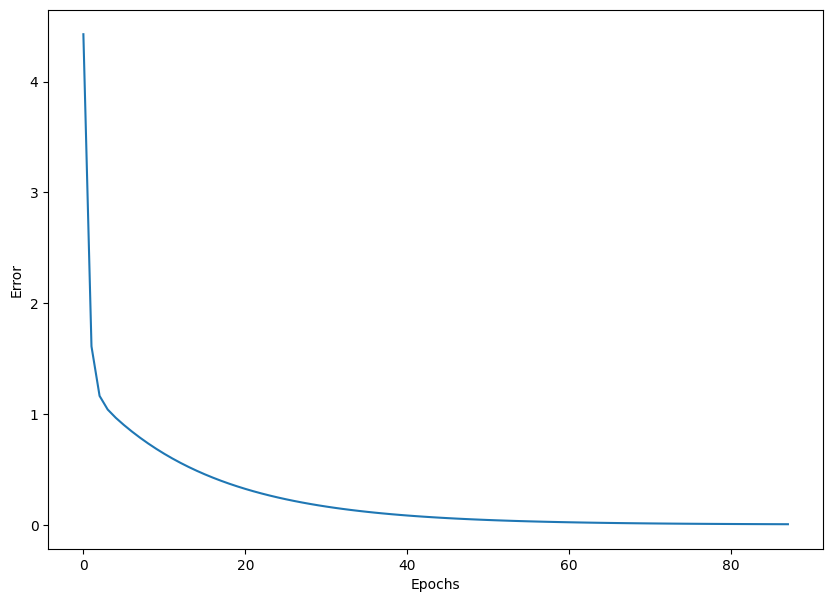

In [3]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## 1-2. 딥러닝 프로세스
- 예측: 예측용 데이터셋을 입력해 모델 예측값을 얻는 과정
- 검증: 모델 성능 평가 단계
- 프로세스: 데이터 로드-> 데이터 전처리(특성 공학, 특성 선택, 특성 추출)-> 데이터 분할-> 모델 생성&컴파일 -> 훈련-> 검증->예측

- 데이터 전처리: 데이터를 모델에 주입하기 전에 데이터 가공. 배열 차원 변경 혹은 스케일 조정
- 모델 생성: 모델의 구조 정의 및 생성
  - 순차적 구조 모델: Sequential API
  - 다중 입력 및 출력으로 복잡한 구조 모델: Functional API, Model Subclassing
- 모델 컴파일: 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 정의
- 모델 훈련: 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 지정
- 모델 검증: 훈련이 완료된 모델 검증. 훈련 때 사용하지 않은 검증 데이터셋을 모델에 입력해 예측 값을 정답과 비교해 평가지표 계산.
- 모델 예측

## 3-2. 단순 신경망 훈련
- 선형회귀: 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있음
- 뉴런: 인공 신경망 모델을 구성하는 하나의 신경. 노드라고도 불림. 신경망은 여러 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨. 뉴런은 가중치가 존재하고 모델이 훈련을 진행하며 오차 역전파를 통해 뉴런 가중치 업데이트
- Dense 레이어: 심층 신경망 모델을 구성하는 기본 레이어. 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있어 완전 연결층이라 부름.

In [4]:
# 샘플 데이터 셋 생성
x=np.arange(1,6)

# y=3x+2
y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


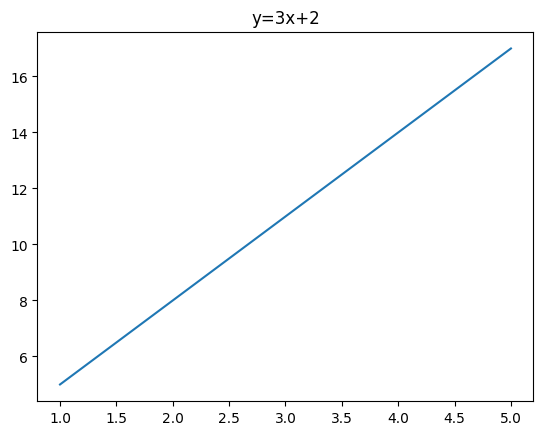

In [5]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

### 2-5. Sequential API
- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식. 입력 레이어부터 출력 레이어까지 순서를 가짐. 입력 데이터는 시퀀스의 가장 앞층에 투입되고 순서대로 각 층을 통과하며 딥러닝 연산 수행


In [6]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [7]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [8]:
# 입력 데이터 형태
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [9]:
# 단순선형 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape={1})
])

- 모델 요약: model.summary()로 모델 요약. 모델 구조, 층별 노드 개수 표기, 파라미터 개수 표기.
- 컴파일: 옵티마이저, 손실함수, 평가지표를 클래스 인스턴스, 함수, 사전 정의도 문자열로 지정
  - 클래스 인스턴스로 지정: 학습률, 모멘텀 등ㅇ의 하이퍼파라미터 사용자 직접 지정

In [10]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [11]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [12]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [13]:
# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

- 훈련: 가중치 테서 업데이트 하는 과정

In [14]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history=model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 804ms/step - loss: 304.7938 - mae: 16.1364
Epoch 2/1200
1/1 [==============================] - 0s 22ms/step - loss: 177.6498 - mae: 12.3437
Epoch 3/1200
1/1 [==============================] - 0s 15ms/step - loss: 103.5564 - mae: 9.4483
Epoch 4/1200
1/1 [==============================] - 0s 16ms/step - loss: 60.3783 - mae: 7.2379
Epoch 5/1200
1/1 [==============================] - 0s 15ms/step - loss: 35.2159 - mae: 5.5505
Epoch 6/1200
1/1 [==============================] - 0s 16ms/step - loss: 20.5524 - mae: 4.2622
Epoch 7/1200
1/1 [==============================] - 0s 16ms/step - loss: 12.0070 - mae: 3.2787
Epoch 8/1200
1/1 [==============================] - 0s 17ms/step - loss: 7.0270 - mae: 2.5278
Epoch 9/1200
1/1 [==============================] - 0s 16ms/step - loss: 4.1246 - mae: 1.9546
Epoch 10/1200
1/1 [==============================] - 0s 15ms/step - loss: 2.4331 - mae: 1.5168
Epoch 11/1200
1/1 [===========================

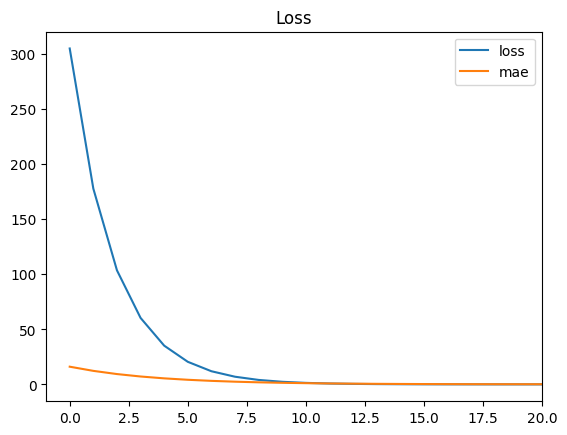

In [15]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

In [17]:
# 검증
model.evaluate(x,y)

1/1 [==============================] - 0s 141ms/step - loss: 2.2370e-05 - mae: 0.0041


[2.2370144506567158e-05, 0.00405960064381361]

In [18]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 171ms/step


array([[32.019623]], dtype=float32)

## 3-3. 심층 신경망으로 이미지 분류
단층 아닌 깊은 층을 쌓아 깊이 있는 딥러닝 모델 생성

In [19]:
# 케라스 내장 데이터셋 로드
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [20]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [21]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


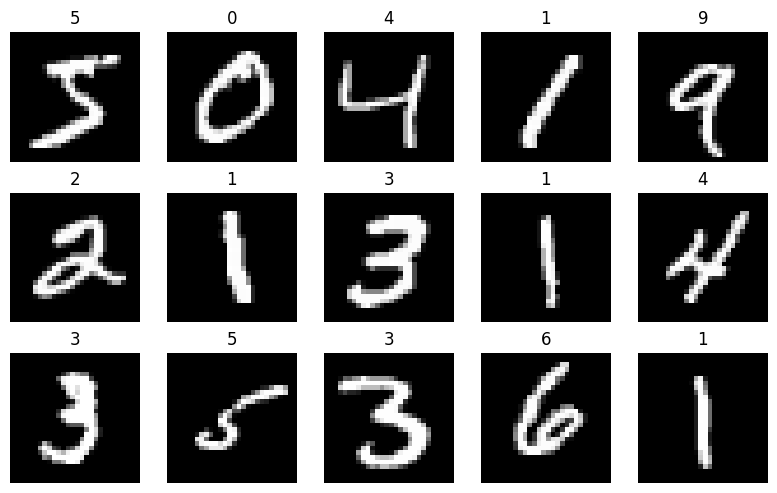

In [22]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax=axes[i//5,i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [23]:
# 데이터 전처리
# x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [24]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train/x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [25]:
# test 셋에도 정규화 통일 적용
x_test = x_test/x_test.max()

In [26]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [27]:
# Flatten 레이어
print(f'변경 전 shape: {x_train.shape}')
print(f'1D로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
1D로 shape 변경 후: (60000, 784)


- 활성화 함수: 입력을 비선형 출력으로 변환해주는 함수.
- 시그모이드, 하이퍼볼릭 탄젠트, 렐루, 리키 렐루


In [28]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [29]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

In [31]:
# 입력과 출력
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    # 노드=10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [32]:
# 출력층 노드=1인 경우 sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드=2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

- 손실함수

In [33]:
# 이진 분류(출력 노드 개수=1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [34]:
# y가 원핫 벡터인 경우
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

- 옵티마이저: 손실을 낮추기 위해 신경망의 가중치와 학습률 같은 속성 변경

In [35]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

- 평가지표

In [36]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[acc])

In [38]:
# 문자열로 지정
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2364 - accuracy: 0.9286 - val_loss: 0.1220 - val_accuracy: 0.9610
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0971 - accuracy: 0.9706 - val_loss: 0.0936 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0669 - accuracy: 0.9793 - val_loss: 0.0823 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0494 - accuracy: 0.9838 - val_loss: 0.0751 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0749 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0831 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0837 - val_ac

In [40]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1044 - accuracy: 0.9771
검증 셋 정확도: 0.9771000146865845


In [41]:
# 예측
predictions=model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [42]:
# 예측 결과 출력
predictions[0]

array([1.15856534e-11, 6.74846845e-10, 1.26568242e-10, 1.31555183e-10,
       4.73818658e-11, 8.84247450e-12, 5.35451242e-16, 9.99999821e-01,
       5.39816192e-10, 1.44151841e-07], dtype=float32)

In [43]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


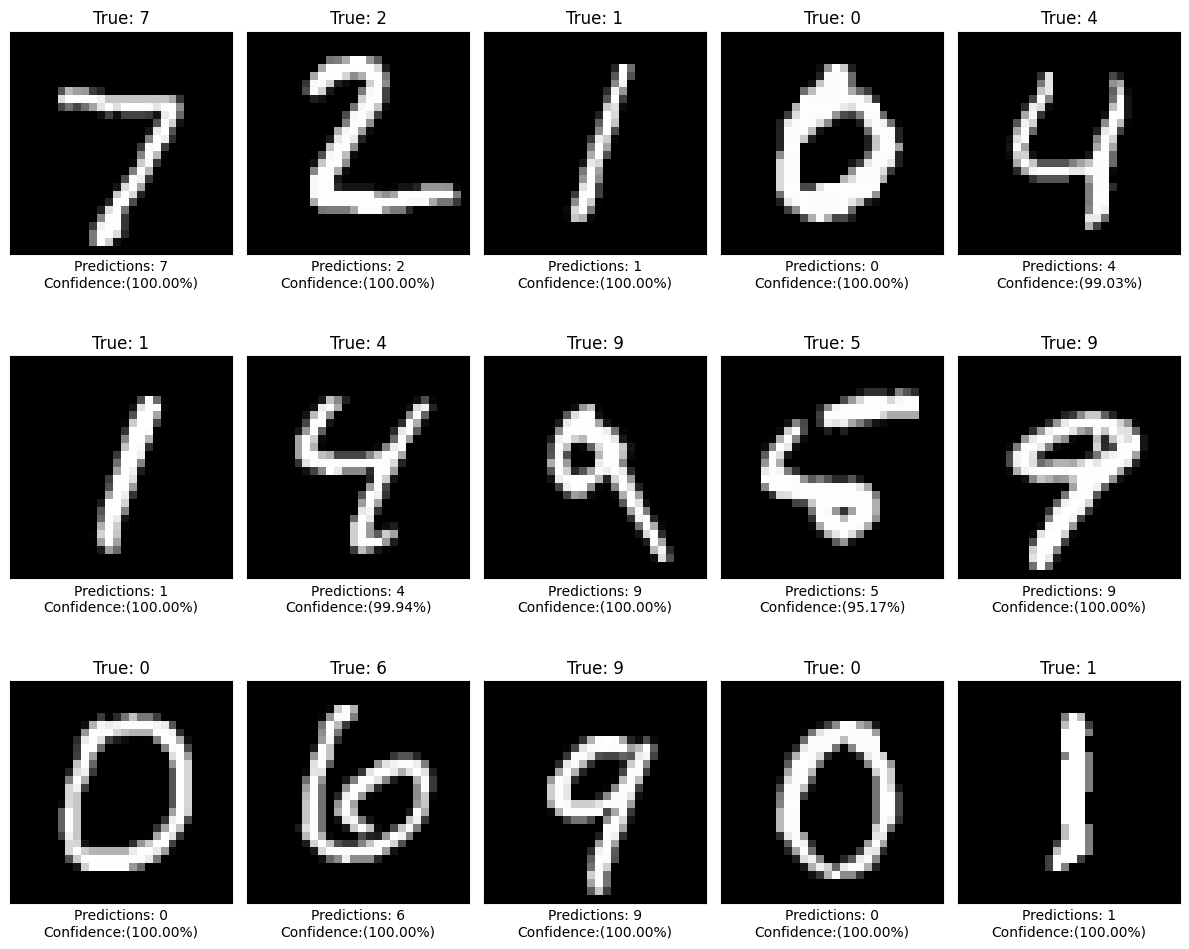

In [45]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img,y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax=axes[i//5,i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img,cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Predictions: {y_pred}\nConfidence:({confidence:.2f}%)')
plt.tight_layout()
plt.show()